### Project Description: Twitter US Airline Sentiment

**Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").**

**Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment The dataset has to be downloaded from the above Kaggle website.**

**The dataset has the following columns:
 tweet_id
 airline_sentiment
 airline_sentiment_confidence
 negativereason
 negativereason_confidence
 airline
 airline_sentiment_gold
 name
 negativereason_gold
 retweet_count
 text
 tweet_coord
 tweet_created
 tweet_location
 user_timezone**

**Objective:
To implement the techniques learnt as a part of the course.**

**Learning Outcomes:
 Basic understanding of text pre-processing.
 What to do after text pre-processing:
o Bag of words
o Tf-idf
 Build the classification model.
 Evaluate the Model.**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
import warnings
warnings.filterwarnings("ignore")


### 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks) -->

In [3]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install pyahocorasick

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re, string, unicodedata
from bs4 import BeautifulSoup

import nltk
import contractions

nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords, wordnet               
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/AsthaBhatia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/AsthaBhatia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/AsthaBhatia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Loading dataset
df = pd.read_csv('tweets.csv')

In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [9]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [10]:
# Shape of data
df.shape

(14640, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [12]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [13]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [14]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640,NaN,NaN,NaN,5.69218e+17,7.79111e+14,5.67588e+17,5.68559e+17,5.69478e+17,5.6989e+17,5.70311e+17
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1,1,1
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522,NaN,NaN,NaN,0.638298,0.33044,0,0.3606,0.6706,1,1
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640,NaN,NaN,NaN,0.0826503,0.745778,0,0,0,0,44


In [15]:
# Check for duplicate rows
duplicate = df[df.duplicated(keep = False)]
duplicate.head()
duplicate.shape
# There are 72 duplicate rows i.e. 36 pairs

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
11898,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
11902,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
11905,570301929580048385,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
11907,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)


(72, 15)

In [16]:
# Drop the first occurences of duplicate rows & retain the 2nd one
df.drop_duplicates(keep='first',inplace=True) 

In [17]:
# There are 14604 rows and 15 columns after dropping 36 duplicate rows from the initial load dataset
df.shape

(14604, 15)

In [18]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14604,NaN,NaN,NaN,5.69216e+17,7.78257e+14,5.67588e+17,5.68558e+17,5.69473e+17,5.69888e+17,5.70311e+17
airline_sentiment,14604,3,negative,9159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14604,NaN,NaN,NaN,0.899923,0.162955,0.335,0.6923,1,1,1
negativereason,9159,10,Customer Service Issue,2904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10503,NaN,NaN,NaN,0.637644,0.33038,0,0.3605,0.6705,1,1
airline,14604,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14604,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14604,NaN,NaN,NaN,0.0827855,0.746647,0,0,0,0,44


In [19]:
columns =['airline_sentiment','negativereason','airline']

#Value counts of relevant columns.
for i in list(columns):   # checking value counts of all object type columns
    print(df[i].value_counts(normalize = True))
    print()

negative    0.627157
neutral     0.211654
positive    0.161189
Name: airline_sentiment, dtype: float64

Customer Service Issue         0.317065
Late Flight                    0.181242
Can't Tell                     0.129927
Cancelled Flight               0.092041
Lost Luggage                   0.078720
Bad Flight                     0.063326
Flight Booking Problems        0.057757
Flight Attendant Complaints    0.052407
longlines                      0.019434
Damaged Luggage                0.008079
Name: negativereason, dtype: float64

United            0.261709
US Airways        0.199466
American          0.186456
Southwest         0.165708
Delta             0.152150
Virgin America    0.034511
Name: airline, dtype: float64



<Figure size 504x504 with 0 Axes>

<AxesSubplot:ylabel='airline'>

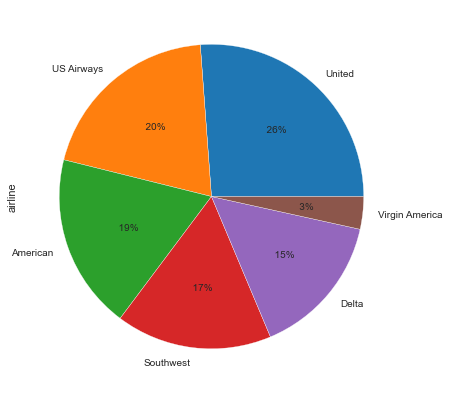

In [20]:
plt.figure(figsize=(7,7))
df['airline'].value_counts().plot(kind='pie',autopct='%4.0f%%')

#### Reasons for negative reviews about airlines - Overall

<Figure size 1584x360 with 0 Axes>

Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

<AxesSubplot:xlabel='negativereason', ylabel='count'>

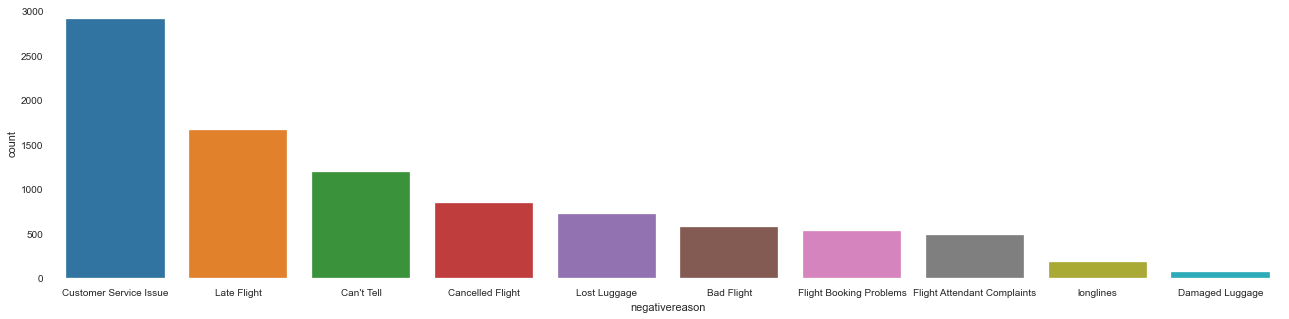

In [21]:
plt.figure(figsize=(22,5))
df['negativereason'].value_counts()
sns.countplot(df['negativereason'], order = df['negativereason'].value_counts().index)

#### Reasons for negative reviews about airlines : United

<Figure size 1584x360 with 0 Axes>

Customer Service Issue         681
Late Flight                    525
Can't Tell                     379
Lost Luggage                   269
Bad Flight                     216
Cancelled Flight               181
Flight Attendant Complaints    168
Flight Booking Problems        144
longlines                       48
Damaged Luggage                 22
Name: negativereason, dtype: int64

<AxesSubplot:xlabel='negativereason', ylabel='count'>

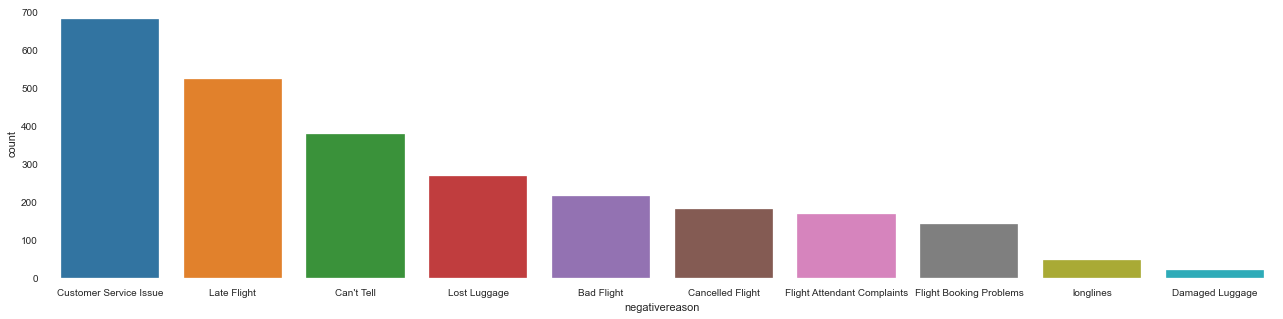

In [22]:
plt.figure(figsize=(22,5))
United = df[df.airline == 'United']
United['negativereason'].value_counts()
sns.countplot(United['negativereason'], order = United['negativereason'].value_counts().index)

#### Reasons for negative reviews about airlines : US Airways

<Figure size 1584x360 with 0 Axes>

Customer Service Issue         811
Late Flight                    453
Can't Tell                     246
Cancelled Flight               189
Lost Luggage                   154
Flight Attendant Complaints    123
Flight Booking Problems        122
Bad Flight                     104
longlines                       50
Damaged Luggage                 11
Name: negativereason, dtype: int64

<AxesSubplot:xlabel='negativereason', ylabel='count'>

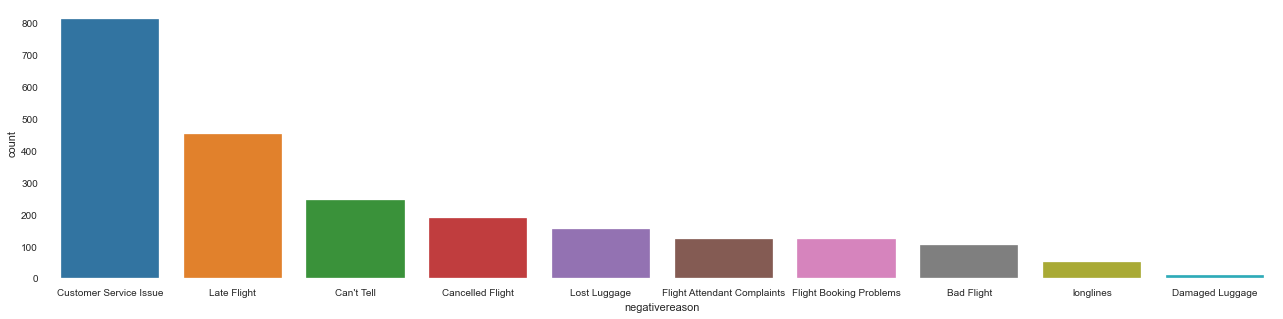

In [23]:
plt.figure(figsize=(22,5))
USAirways = df[df.airline == 'US Airways']
USAirways['negativereason'].value_counts()
sns.countplot(USAirways['negativereason'], order = USAirways['negativereason'].value_counts().index)

#### Reasons for negative reviews about airlines : American

<Figure size 1584x360 with 0 Axes>

Customer Service Issue         762
Late Flight                    244
Cancelled Flight               242
Can't Tell                     198
Lost Luggage                   146
Flight Booking Problems        130
Bad Flight                      87
Flight Attendant Complaints     86
longlines                       34
Damaged Luggage                 12
Name: negativereason, dtype: int64

<AxesSubplot:xlabel='negativereason', ylabel='count'>

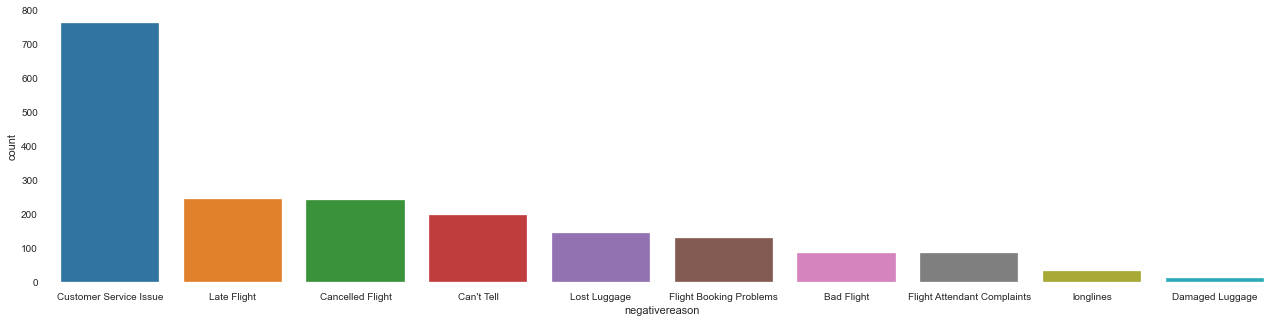

In [24]:
plt.figure(figsize=(22,5))
American = df[df.airline == 'American']
American['negativereason'].value_counts()
sns.countplot(American['negativereason'], order = American['negativereason'].value_counts().index)

#### Reasons for negative reviews about airlines : Southwest

<Figure size 1584x360 with 0 Axes>

Customer Service Issue         391
Cancelled Flight               162
Can't Tell                     159
Late Flight                    152
Bad Flight                      90
Lost Luggage                    90
Flight Booking Problems         61
Flight Attendant Complaints     38
longlines                       29
Damaged Luggage                 14
Name: negativereason, dtype: int64

<AxesSubplot:xlabel='negativereason', ylabel='count'>

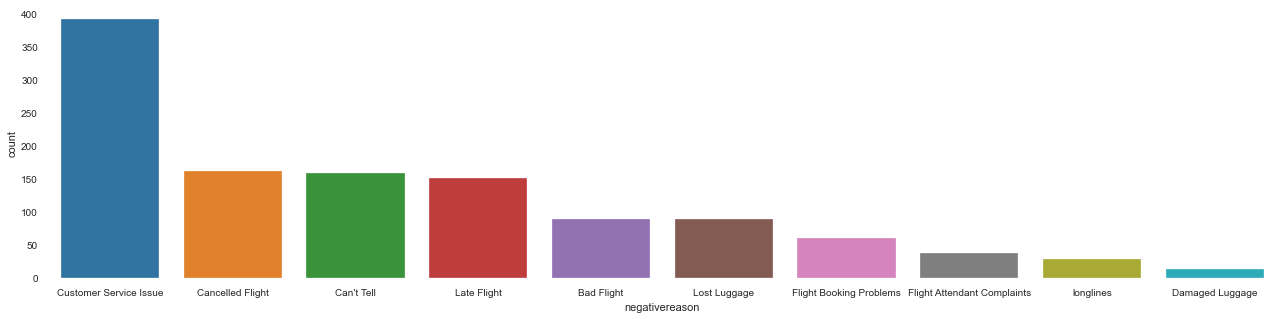

In [25]:
plt.figure(figsize=(22,5))
Southwest = df[df.airline == 'Southwest']
Southwest['negativereason'].value_counts()
sns.countplot(Southwest['negativereason'], order = Southwest['negativereason'].value_counts().index)

#### Reasons for negative reviews about airlines : Delta

<Figure size 1584x360 with 0 Axes>

Late Flight                    269
Customer Service Issue         199
Can't Tell                     186
Bad Flight                      64
Flight Attendant Complaints     60
Lost Luggage                    57
Cancelled Flight                51
Flight Booking Problems         44
longlines                       14
Damaged Luggage                 11
Name: negativereason, dtype: int64

<AxesSubplot:xlabel='negativereason', ylabel='count'>

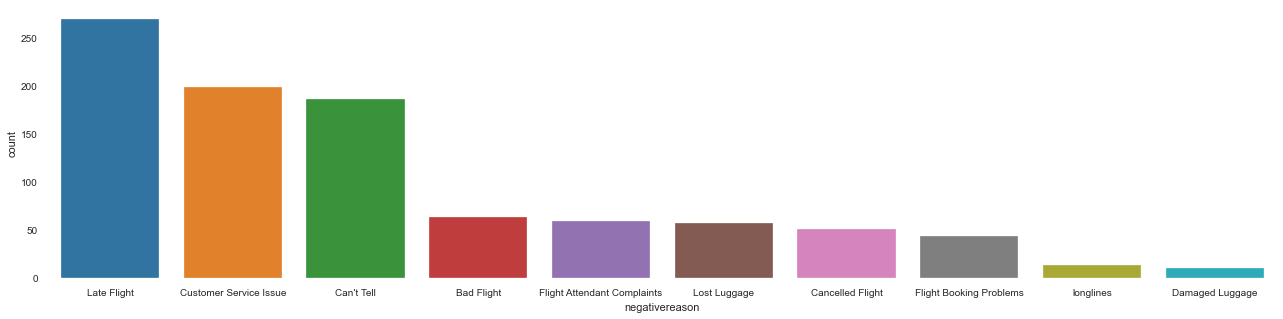

In [26]:
plt.figure(figsize=(22,5))
Delta = df[df.airline == 'Delta']
Delta['negativereason'].value_counts()
sns.countplot(Delta['negativereason'], order = Delta['negativereason'].value_counts().index)

#### Reasons for negative reviews about airlines : Virgin America

<Figure size 1584x360 with 0 Axes>

Customer Service Issue         60
Flight Booking Problems        28
Can't Tell                     22
Bad Flight                     19
Cancelled Flight               18
Late Flight                    17
Lost Luggage                    5
Flight Attendant Complaints     5
Damaged Luggage                 4
longlines                       3
Name: negativereason, dtype: int64

<AxesSubplot:xlabel='negativereason', ylabel='count'>

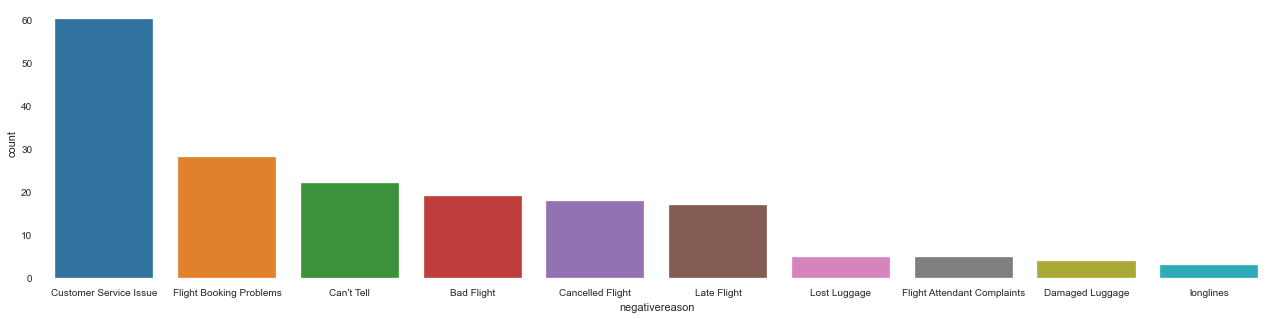

In [27]:
plt.figure(figsize=(22,5))
VirginAmerica = df[df.airline == 'Virgin America']
VirginAmerica['negativereason'].value_counts()
sns.countplot(VirginAmerica['negativereason'], order = VirginAmerica['negativereason'].value_counts().index)

#### Airline Sentiment Classification about each airline

<Figure size 1440x576 with 0 Axes>

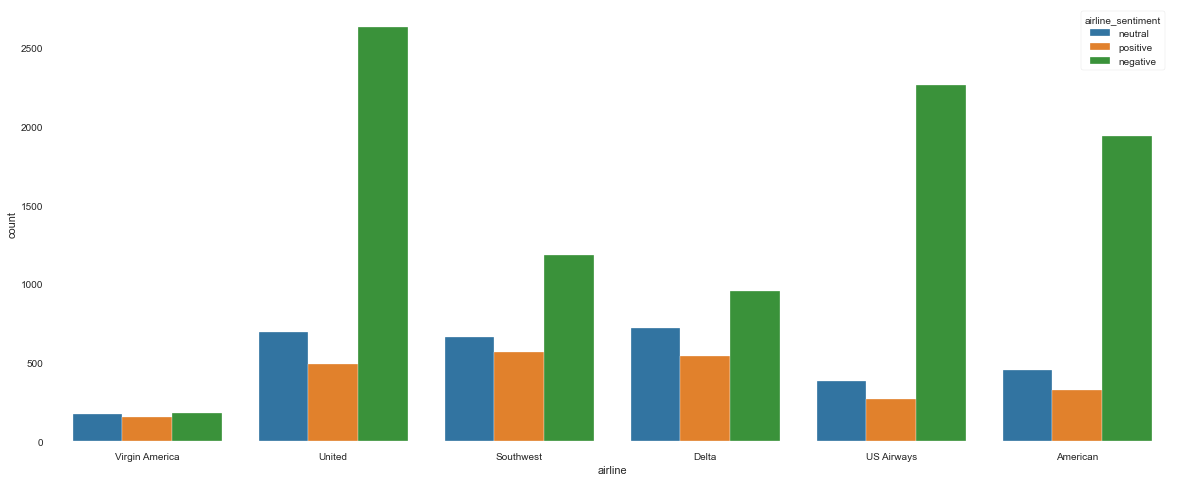

In [28]:
plt.figure(figsize=(20,8))
ax=sns.countplot(x=df['airline'],hue=df['airline_sentiment'])
plt.show()

Summary

*   There were 14640 rows and 15 columns in the tweet data given in the project dataset
*   There were 72 duplicate records (36 pairs) in the data set. Hence we have removed first occurences of these           records.
*   After removing, our final dataset contains 14604 records.
*   Twitter reviews and corresponding sentiments (positive, negative or neutral) about 6 airlines (United, US Airways,     American, Southwest, Delta & Virgin America) are given in the data set.
*   Maximum reviews are for United Airlines (26.1%) & least for Virgin America(3.4%).
*   62.7% of the comments indicate negative sentiment followed by 21.2% neutral and 16.1% positive.
*   Additionally, reasons for negative sentiments are provided in the data set. United Airlines, US Airways, American     Airlines have the most number of negative reviews.
*   Customer service and Late flight are the main reasons for negative feedback given by customers across most of     the airlines.

### 2. Understanding of data-columns: (5 Marks)  a. Drop all other columns except “text” and “airline_sentiment”. b. Check the shape of data. c. Print first 5 rows of data.

In [29]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [30]:
#Drop columns
df = df.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason','negativereason_confidence',
'airline','airline_sentiment_gold','name', 'negativereason_gold','retweet_count','tweet_coord','tweet_created',
'tweet_location','user_timezone'], axis=1)

In [31]:
df.shape

(14604, 2)

In [32]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [33]:
# First row of data.
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

df.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64


<Figure size 216x216 with 0 Axes>

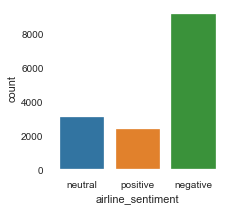

In [34]:
# Check if data is balanced
y = df['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(3,3)) 
g = sns.countplot(y)
# Here we see that the data is not balanced, There are lot of negative sentiments

### 3. Text pre-processing: Data preparation. (20 Marks)

In [35]:
df.head(15)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


**Html tag removal**

In [36]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['text'] = df['text'].apply(lambda x: strip_html(x))
df.head(15)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


**denoise text**

In [37]:
def denoise_text(text):
    text = strip_html(text)
    return text

df['text'] = df['text'].apply(lambda x: denoise_text(x))
df.head(15)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


**http link removal**

In [38]:
def remove_http(text):
  text = re.sub(r"http\S+","", text)
  return text

df['text'] = df['text'].apply(lambda x: remove_http(x))
df.head(15)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there."
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


**replace contractions**

In [39]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there."
8,positive,"@virginamerica Well, I did not…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. you are too good to me."


**tokenization**

In [40]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df.head(15)

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,negative,"[@, VirginAmerica, seriously, would, pay, $, 30, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]"
6,positive,"[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, :, )]"
7,neutral,"[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, .]"
8,positive,"[@, virginamerica, Well, ,, I, did, not…but, NOW, I, DO, !, :, -D]"
9,positive,"[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., you, are, too, good, to, me, .]"


**remove numbers**

In [41]:
def remove_numbers(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'\d+', '', word)
        new_words.append(new_word)
    return new_words

**removal of special characters and punctuations**

In [42]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

**conversion to lowercase**

In [43]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

**stop words removal**

In [44]:
import nltk
nltk.download() # to download stopwords corpus
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [45]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

**Lemmatize or stemming.**

In [47]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

In [48]:
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

**Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)**

In [49]:
def normalize(words):
    words = remove_numbers(words)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
#   words = stem_words(clean_review)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)

In [50]:
df.head(15)

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing
5,negative,virginamerica seriously would pay flight seat play really bad thing fly va
6,positive,virginamerica yes nearly every time fly vx ear worm go away
7,neutral,virginamerica really miss prime opportunity men without hat parody
8,positive,virginamerica well notbut
9,positive,virginamerica amaze arrive hour early good


**Print first 5 rows of data after pre-processing**

In [51]:
df.head(5)

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


### 4. Vectorization: (10 Marks)       a. Use CountVectorizer.      b. Use TfidfVectorizer.

**Count Vectorizer**

In [52]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             max_features = 5000)                 # Keeping 5000 features as number of features will increase the processing time.
features_count = countvectorizer.fit_transform(df['text'])

features_count = features_count.toarray()

In [53]:
features_count.shape

(14604, 5000)

In [54]:
vocabcount = countvectorizer.get_feature_names()
print (vocabcount)

['aa', 'aacom', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'acct', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'afterall', 'afternoon', 'age', 'agency', 'agent', 'agents', 'aggravate

In [55]:
# Sum up the counts of each vocabulary word
dist = np.sum(features_count, axis=0)

# For each, print the vocabulary word and the number of times it appears
for tag, count in zip(vocabcount, dist):
    print (count, tag)

279 aa
3 aacom
2 aadv
10 aadvantage
2 aafail
2 aal
2 aano
3 aarp
3 abandon
8 abc
3 abcnetwork
2 abilities
5 ability
120 able
4 aboard
9 abq
2 abroad
22 absolute
30 absolutely
13 absurd
7 abt
3 abuse
6 abysmal
9 ac
32 accept
23 acceptable
39 access
5 accident
4 accidentally
26 accommodate
8 accommodations
4 accomplish
11 accord
4 accordingly
80 account
6 accountability
2 accrue
11 acct
2 accts
10 accurate
2 accuse
3 achieve
4 acknowledge
2 acknowledgement
2 acknowledgment
2 acquire
2 acquisition
16 across
18 act
13 action
2 activate
4 active
2 activitiesprevention
21 actual
86 actually
4 ad
2 adam
127 add
4 addition
17 additional
53 address
3 addtl
2 adjacent
5 admiral
12 admirals
6 admit
6 adopt
2 adore
5 ads
2 adult
14 advance
15 advantage
11 advertise
9 advice
20 advise
2 advisories
24 advisory
2 aerojobmarket
15 affect
3 affiliate
13 afford
3 affordable
2 afraid
2 afterall
30 afternoon
15 age
6 agency
260 agent
155 agents
3 aggravate
3 aggressive
2 agnt
132 ago
9 agree
3 agt
12 ah
1

**Tfidf Vectorizer**

In [56]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             max_features = 5000,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2))
                                  
features_tfidf = tfidfvectorizer.fit_transform(df['text'])
                                  
features_tfidf = features_tfidf.toarray()

In [57]:
features_tfidf.shape

(14604, 5000)

In [58]:
vocabtfidf = tfidfvectorizer.get_feature_names()
print (vocabtfidf)

['aa', 'aa flight', 'aadvantage', 'abc', 'ability', 'able', 'able get', 'able help', 'able use', 'abq', 'absolute', 'absolute worst', 'absolutely', 'absurd', 'abt', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'access journal', 'accident', 'accommodate', 'accommodations', 'accord', 'account', 'account help', 'accountability', 'acct', 'accurate', 'across', 'act', 'act together', 'action', 'actual', 'actually', 'actually get', 'actually work', 'add', 'add flight', 'add passbook', 'additional', 'address', 'admiral', 'admirals', 'admirals club', 'admit', 'adopt', 'ads', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisory', 'affect', 'afford', 'afternoon', 'age', 'agency', 'agent', 'agent call', 'agent flight', 'agent help', 'agent phone', 'agent say', 'agents', 'agents busy', 'ago', 'ago flight', 'ago still', 'agree', 'ah', 'ahead', 'ahold', 'air', 'air traffic', 'air travel', 'airbus', 'aircanada', 'aircraft', 'airfare', 'airline', 'airline cancel', 'airline ever', 'a

In [59]:
# Sum up the counts of each vocabulary word
dist = np.sum(features_tfidf, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocabtfidf, dist):
    print (count, tag)

66.2631958252114 aa
3.1973629758674873 aa flight
3.2822698324940562 aadvantage
3.4740829523968064 abc
2.1277736534998355 ability
32.70421764985368 able
8.462109919130832 able get
2.438330092321867 able help
1.7344237106983575 able use
3.2668391194151294 abq
8.418739520300523 absolute
2.3585492996630526 absolute worst
11.480500292593991 absolutely
5.197221129192761 absurd
2.597633924015719 abt
2.256763106760708 abysmal
3.562326561329483 ac
11.449964031944496 accept
8.822961293550163 acceptable
12.769333500943805 access
1.6622491874273422 access journal
2.2011956098922183 accident
9.235637476374086 accommodate
3.3472482720903516 accommodations
4.379915642886991 accord
22.758652455061924 account
1.9176795950720835 account help
2.411147261419108 accountability
4.067622564994004 acct
3.673629584598539 accurate
5.911350382086082 across
6.0668506668953 act
2.771422608692749 act together
4.838358948713677 action
7.646402079285653 actual
26.610229487171814 actually
2.436442144293058 actually ge

### 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

**Count Vectorizer**

In [60]:
y.value_counts()

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

In [61]:
x = features_count     # Predictor feature columns
y = df['airline_sentiment']   # Predicted class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10222, 5000)
(10222,)
(4382, 5000)
(4382,)


**Applying SMOTE since the data is not balanced**

In [63]:
smt = SMOTE(random_state=0)
x_train_SMOTE, y_train_SMOTE = smt.fit_sample(x_train, y_train)

In [64]:
print(x_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(19254, 5000)
(19254,)


In [65]:
y_train_SMOTE

0        positive
1        negative
2        negative
3        positive
4        negative
           ...   
19249    positive
19250    positive
19251    positive
19252    positive
19253    positive
Name: airline_sentiment, Length: 19254, dtype: object

positive    6418
negative    6418
neutral     6418
Name: airline_sentiment, dtype: int64


<Figure size 360x360 with 0 Axes>

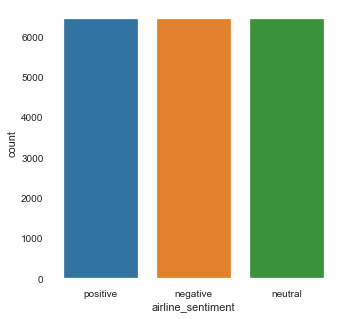

In [66]:
after_smote_airline_sentiment=pd.DataFrame(y_train_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(5,5)) 
g = sns.countplot(y)
# Here we can see that after applying smote, the data is balanced

In [67]:
# Dividing the test data into test and validation set in 50-50 ratio
x_val, x_test_, y_val, y_test_ = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

print(x_val.shape)
print(x_test_.shape)


print(y_val.shape)
print(y_test_.shape)

# There are 2191 samples for validation and 2191 samples for testing

(2191, 5000)
(2191, 5000)
(2191,)
(2191,)


In [68]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

print ("Training the random forest...")
randomforestclassifier = randomforestclassifier.fit( x_train_SMOTE, y_train_SMOTE)

Training the random forest...


In [69]:
randomforestclassifier.score(x_train_SMOTE, y_train_SMOTE)

0.8917108133374884

In [70]:
#print(np.mean(cross_val_score(randomforestclassifier,x_train_SMOTE, y_train_SMOTE,cv=10)))

In [71]:
# Make class predictions for the Validation set
y_val_pred= randomforestclassifier.predict(x_val)

Training and Validation Accuracy

In [72]:
print("Trainig accuracy",randomforestclassifier.score(x_train_SMOTE,y_train_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier.score(x_val, y_val))
print()

Trainig accuracy 0.8917108133374884

Validation accuracy 0.7357371063441351



Classification Report (Validation Set)

In [73]:
print(metrics.classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

    negative       0.84      0.83      0.84      1359
     neutral       0.54      0.55      0.54       477
    positive       0.60      0.63      0.62       355

    accuracy                           0.74      2191
   macro avg       0.66      0.67      0.67      2191
weighted avg       0.74      0.74      0.74      2191



Confusion Matrix (Validation Set)

<Figure size 576x396 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x7ffbf5f90950>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7ffbf39c6ad0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 576x396 with 0 Axes>

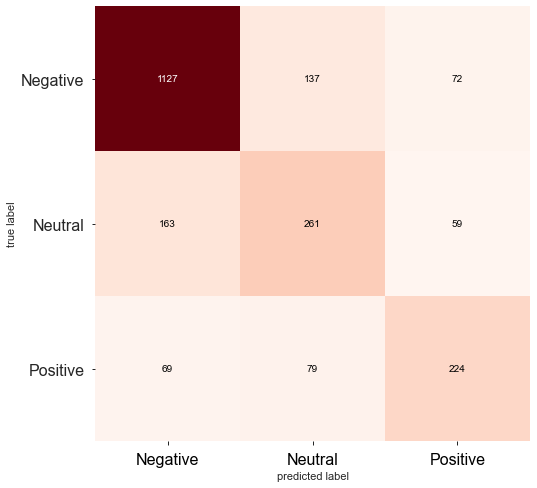

In [74]:
cm=confusion_matrix(y_val_pred , y_val)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Using TfIdf Vectorization**

In [75]:
x_tf = features_tfidf     # Predictor feature columns
y_tf = df['airline_sentiment']   # Predicted class

x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(x_tf, y_tf, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [76]:
print(x_train_tf.shape)
print(y_train_tf.shape)
print(x_test_tf.shape)
print(y_test_tf.shape)

(10222, 5000)
(10222,)
(4382, 5000)
(4382,)


In [77]:
tf_smt = SMOTE(random_state=0)
x_train_tf_SMOTE, y_train_tf_SMOTE = tf_smt.fit_sample(x_train_tf, y_train_tf)

In [78]:
print(x_train_tf_SMOTE.shape)
print(y_train_tf_SMOTE.shape)

(19254, 5000)
(19254,)


positive    6418
negative    6418
neutral     6418
Name: airline_sentiment, dtype: int64


<Figure size 360x360 with 0 Axes>

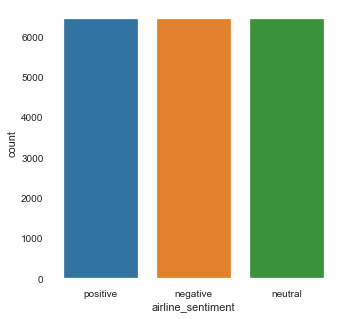

In [79]:
after_smote_airline_sentiment_tf=pd.DataFrame(y_train_tf_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment_tf['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(5,5))
g = sns.countplot(y)
# Here we can see that after smote , the data is balanced

In [80]:
# Dividing the test data into test and validation set in 50-50 ratio
x_val_tf, x_test_tf, y_val_tf, y_test_tf = train_test_split(x_test_tf, y_test_tf, test_size=0.50, random_state=1)

print(x_val_tf.shape)
print(x_test_tf.shape)


print(y_val_tf.shape)
print(y_test_tf.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2191, 5000)
(2191, 5000)
(2191,)
(2191,)


In [81]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier_tf = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
# Fit the forest to the training set

print ("Training the random forest...")
randomforestclassifier_tf = randomforestclassifier_tf.fit( x_train_tf_SMOTE, y_train_tf_SMOTE)

Training the random forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [82]:
randomforestclassifier_tf.score(x_train_tf_SMOTE, y_train_tf_SMOTE)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


0.9940791523839202

In [83]:
#print (np.mean(cross_val_score(randomforestclassifier_tf_idf,x_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE,cv=10)))

In [84]:
# Make class predictions for the Validation set
y_val_pred_tf= randomforestclassifier_tf.predict(x_val_tf)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


Training and Validation Accuracy

In [85]:
print("Trainig accuracy",randomforestclassifier_tf.score(x_train_tf_SMOTE,y_train_tf_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier_tf.score(x_val_tf, y_val_tf))
print()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


Trainig accuracy 0.9940791523839202

Validation accuracy 0.7425832952989503



[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


Classification Report (Validation Set)

In [86]:
print(metrics.classification_report(y_val_tf,y_val_pred_tf))

              precision    recall  f1-score   support

    negative       0.81      0.87      0.84      1359
     neutral       0.55      0.47      0.50       477
    positive       0.67      0.63      0.65       355

    accuracy                           0.74      2191
   macro avg       0.68      0.65      0.66      2191
weighted avg       0.73      0.74      0.74      2191



<Figure size 576x396 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x7ffbf739ae90>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7ffbf73a1690>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 576x396 with 0 Axes>

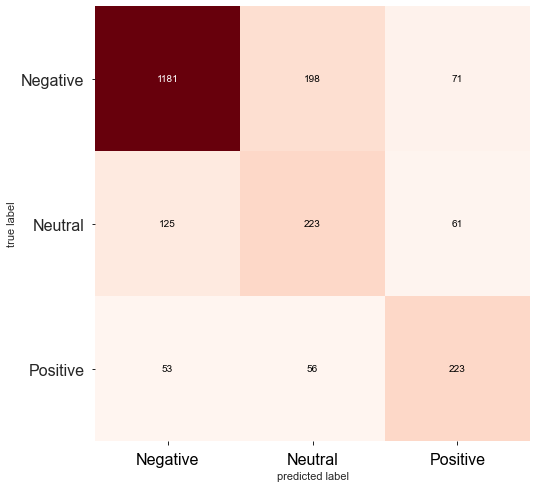

In [87]:
cm=confusion_matrix(y_val_pred_tf , y_val_tf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

### 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

**Application of Various Pre-processing Techniques:**

1. Textual data is unstructured and cannot be processed as it is.
2. Text data also contains a lot of non- required items such as special characters,punctuations etc.
3. We clean up the text corpus to make it processable by ML
4. This text clean-up process is called text pre-processing

Pre-processing steps:
We have been given twitter reviews about various airlines to analyze. The text data contains a lot of non-required items such as html tags, http links, contractions, numnbers, special characters, accented characters, Punctuations, stopwords which we remove/process to clean up the corpus.

Additionally, we apply tokenization & convert all words to lower case in order to have consistency across data. We further apply stemming/lemmatization to only return core roots/canonical forms of various words. Please refer below description of various steps applied:


1. HTML tag cleanup : 
   It returns all the text in a document or beneath a tag, as a single Unicode string

2. Http links removal: 
   References to a location on the web, but do not provide any additional information. 

3. Contractions: 
   Contractions are shortened version of words or syllables. In our everyday verbal and written
   communication, a lot of us tend to contract common words like “you are”  becomes “you’re”. Converting 
   contractions into their natural form brings more insights.
        
4. Tokenization/Text Segmentation/Lexical Analysis
   Tokenization is the task of taking a text or set of text and breaking it up into its individual tokens. 
   Tokens are usually individual words (at least in languages like English).
   Larger chunks of text can be tokenized into sentences, sentences can be tokenized into words, etc. 
   Further processing is generally performed after a piece of text has been appropriately tokenized. 
   Sometimes segmentation is used to refer to the breakdown of a large chunk of text into pieces larger than words 
   (e.g. paragraphs or sentences), while tokenization is reserved for the breakdown process which results exclusively
   in words.   
   
4. Removing numbers: 
   Remove numbers from list of tokenized 

5. Remove special characters
   Accented Characters: We need to make sure that these characters are converted and standardized into ASCII 
   characters.
   Special characters and symbols are usually non-alphanumeric characters or even occasionally numeric characters 
   (depending on the problem), which add to the extra noise in unstructured text.

6. Remove punctuation
   Remove punctuation from list of tokenized words
   
7. Convert text to lower case
   Converting all text to the same case 
   
8. Remove empty strings
   Remove empty string from list of tokenized words
   
9. Stopwords: 
   Stopwords are common words that carry less important meaning than keyword. When using some bag of words 
   based methods, i.e, countVectorizer or tf-idf that works on counts and frequency of the words, removing stopwords 
   is great as it lowers the dimensionality
   Removing stopwords minimizes computation
   
10. Stemming
    Converting the words into their base word or stem word ( Ex - tastefully, tasty, these words are converted to stem     word called 'tasti'). This reduces the vector dimension because we dont consider all similar words
   
11. Lemmatization
    Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the       language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form,       dictionary form, or citation form of a set of words.

**Vectorization Techniques after pre-processing:**

These are the popular techniques that are used for encoding:

Bag of words (CountVectorization)                             
In BoW we construct a dictionary that contains set of all unique words from our text review dataset.                    The frequency of the word is counted here. If there are d unique words in our dictionary then for every sentence or review the vector will be of length dand count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.

Tf-idf (TfIdfVectorization) (Term Frequency - Inverse Document Frequency)
Term Frequency - Inverse Document Frequency it makes sure that less importance is given to most frequent words and also considers less frequent words.
Term Frequency is number of times a particular word(W) occurs in a review divided by totall number of words (Wr) in review. The term frequency value ranges from 0 to 1.
Inverse Document Frequency is calculated as log(Total Number of Docs(N) / Number of Docs which contains particular word(n)). Here Docs referred as Reviews. TF-IDF is TF * IDF that is (W/Wr)*LOG(N/n)

**Performance of model**

**Count Vectroizer**

Testing Data Accuracy

In [88]:
print("Testing accuracy",randomforestclassifier.score(x_test, y_test))
print()

Testing accuracy 0.7393884071200365



Classification Report

In [89]:
# Make class predictions for the Validation set
y_test_pred= randomforestclassifier.predict(x_test)

print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    negative       0.84      0.83      0.83      2741
     neutral       0.54      0.56      0.55       949
    positive       0.62      0.64      0.63       692

    accuracy                           0.74      4382
   macro avg       0.67      0.68      0.67      4382
weighted avg       0.74      0.74      0.74      4382



Confusion Matrix:


<Figure size 576x396 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x7ffbf7cfd1d0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7ffbf81d7a50>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 576x396 with 0 Axes>

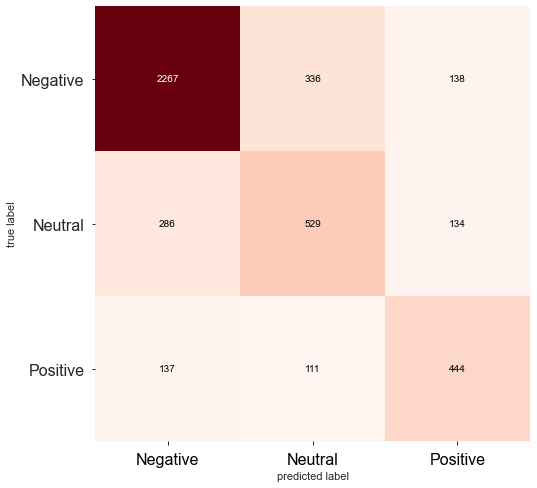

In [90]:
cm=confusion_matrix(y_test , y_test_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**TFIDF
Vectroizer**

Testing Data Accuracy

In [91]:
print("Test accuracy",randomforestclassifier_tf.score(x_test_tf, y_test_tf))
print()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


Test accuracy 0.758557736193519



Classification Report

In [92]:
# Make class predictions for the test set
y_test_pred_tf= randomforestclassifier_tf.predict(x_test_tf)
print(metrics.classification_report(y_test_tf,y_test_pred_tf))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      1382
     neutral       0.58      0.53      0.55       472
    positive       0.70      0.63      0.66       337

    accuracy                           0.76      2191
   macro avg       0.70      0.68      0.69      2191
weighted avg       0.75      0.76      0.75      2191



[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


Confusion Matrix

<Figure size 576x396 with 0 Axes>

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x7ffbf801cb90>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7ffbf80196d0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 576x396 with 0 Axes>

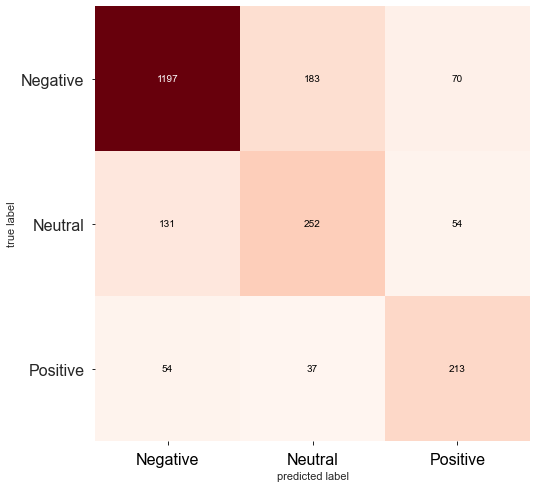

In [93]:
cm=confusion_matrix(y_test_pred_tf , y_test_tf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Conclusion**

*   RandomForestClassifier on TfidfVectorizer has an accuracy of 74% whereas 
RandomForestClassifier on CountVectorizer has an accuracy of 76%. This shows that the model using TfidfVectorizer is better.
*   Model is able to predict airline sentiment correctly 76% of the time
*   United Airlines, US Airways, American Airlines have the most number of negative reviews
*   Virgin America has the least number of negative reviews
*   Customer service and Late flight are the main reasons for negative feedback given by customers across most of         the airlines.

**GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-astha1992**